In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import math

In [292]:
dataSet = pd.read_excel('Concrete_Data.xls')
dataSet.columns = ['Cement','Slag','Ash','Water','Superplasticizer','Coarse','Fine','Age','strength']

In [293]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Slag                1030 non-null float64
Ash                 1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
Coarse              1030 non-null float64
Fine                1030 non-null float64
Age                 1030 non-null int64
strength            1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [294]:
dataSet.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
strength            0
dtype: int64

In [295]:
dataSet.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA2E19B5F8>,
      dtype=object)

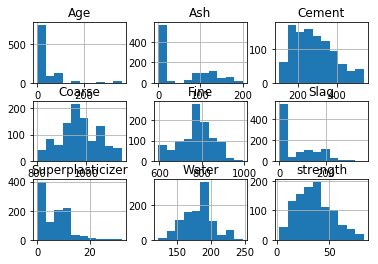

In [296]:
dataSet.hist()

In [297]:
X = dataSet.iloc[:,[0,1,2,3,7]].values
y = dataSet.iloc[:,-1].values

In [298]:
from sklearn.preprocessing import PolynomialFeatures
x_poly = PolynomialFeatures(degree=4)
X = x_poly.fit_transform(X)

In [299]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [300]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [301]:
print('The Features to be trained on :', X_train.shape )
print('The Labels to be trained on :', y_train.shape )
print('The Features to be tested on :', X_test.shape )
print('The Labels to be tested on :', y_test.shape )
print('X_train type : ', type(X_train), 'X_test type :',type(X_test) ,'y_train type :', type(y_train) , 'y_test type :', type(y_test) )

The Features to be trained on : (824, 126)
The Labels to be trained on : (824,)
The Features to be tested on : (206, 126)
The Labels to be tested on : (206,)
X_train type :  <class 'numpy.ndarray'> X_test type : <class 'numpy.ndarray'> y_train type : <class 'numpy.ndarray'> y_test type : <class 'numpy.ndarray'>


In [302]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [303]:
y_pred = model.predict(X_test)

In [304]:
from sklearn.metrics import mean_squared_error
valid = mean_squared_error(y_pred,y_test)
valid

27.20475741392965

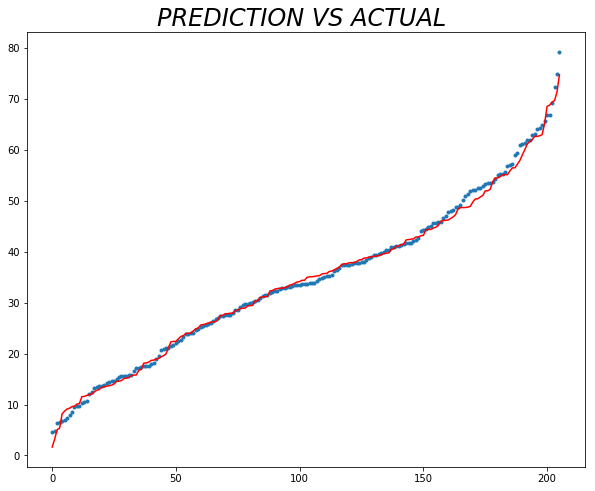

In [305]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')


plt.plot(range(len(y_test)), np.sort(y_test), '.')
plt.plot(range(len(y_test)),np.sort(y_pred),c='r')
plt.show()